[source](https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# style choice
## Matplotlib
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (12,8)

In [3]:
data_file_path = 'heart.csv'
data_df = pd.read_csv(data_file_path)

#To get information on the number of entries and the datatypes of the features
data_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# simple query for missing data
data_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

/home/henri/miniconda2/envs/lighthouse-lab-course/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


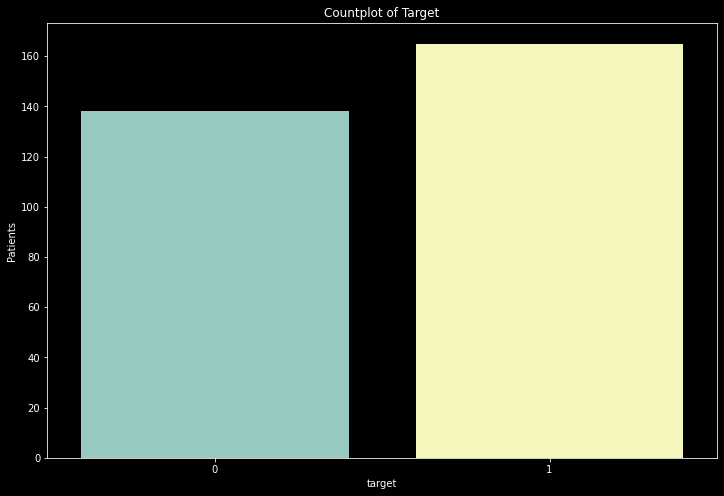

In [5]:

#2. distribution of target variable.
sns.countplot(data_df['target'])

# Add labels
plt.title('Countplot of Target')
plt.xlabel('target')
plt.ylabel('Patients')
plt.show()

In [6]:
y = data_df["target"].values
x = data_df.drop(["target"], axis = 1)

#Scaling - mandatory for knn
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

#SPlitting into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) # 70% training and 30% test

Determining the optimal number of 

In [11]:
train_score = []
test_score = []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)

In [12]:
## score that comes from the testing set only
max_test_score = max(test_score)
test_scores_ind = [i for i, v in enumerate(test_score) if v == max_test_score]
print('Max test score {} and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))

Max test score 84.61538461538461 and k = [5, 8]


Interresting, since we shuffle our data 

In [13]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(3)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8131868131868132

In [14]:
# confusion matrix to determine the fit
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,27,12,39
1,5,47,52
All,32,59,91


## Precision
Precision is the ratio between the True Positives and all the Positives.
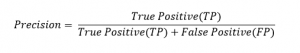

## Recall
The recall is the measure of our model correctly identifying True Positives. Thus, for all the patients who actually have heart disease, recall tells us how many we correctly identified as having a heart disease.

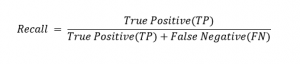

## accuracy
Accuracy is the ratio of the total number of correct predictions and the total number of predictions
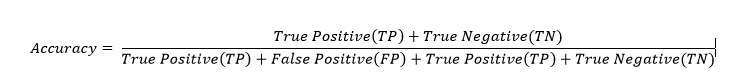

Important to use precision and recall with accuracy.
Not always possible to have high precision and high recal:
* High recall/low precision: we might detect all the patients who actually have heart disease, but we might end up giving treatments to a lot of patients who don’t suffer from it.
* low recall/high precision: we might detect all the patients who actually have heart disease, but we might end up giving treatments to a lot of patients who don’t suffer from it.

## F1 score

This is where we must decide what is more important given the situation e.g. cancer vs spam

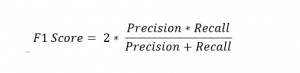

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.69      0.76        39
           1       0.80      0.90      0.85        52

    accuracy                           0.81        91
   macro avg       0.82      0.80      0.80        91
weighted avg       0.82      0.81      0.81        91



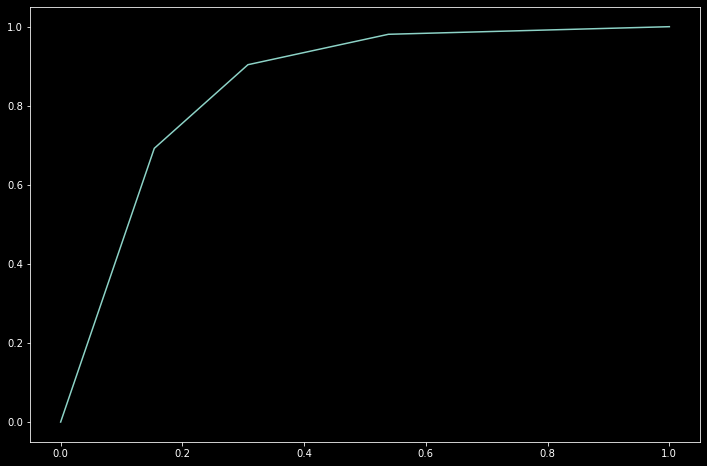

In [17]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr,tpr)

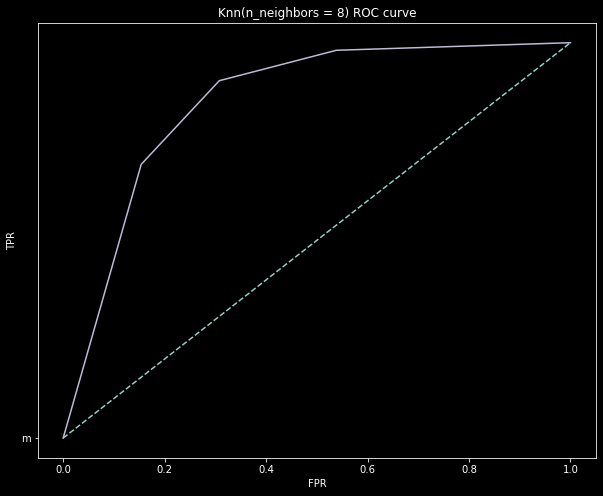

In [26]:
plt.figure(figsize = (10,8))
plt.plot([0, 1], [0, 1], '--','m')
plt.plot(fpr, tpr, label='Knn')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Knn(n_neighbors = 8) ROC curve')
plt.show()

AUC Interpretation-

   * At the lowest point, i.e. at (0, 0)- the threshold is set at 1.0. This means our model classifies all patients as not having a heart disease.
   * At the highest point i.e. at (1, 1), the threshold is set at 0.0. This means our model classifies all patients as having a heart disease.
   * The rest of the curve is the values of FPR and TPR for the threshold values between 0 and 1. At some threshold value, we observe that for FPR close to 0, we are achieving a TPR of close to 1. This is when the model will predict the patients having heart disease almost perfectly.
   * The area with the curve and the axes as the boundaries is called the Area Under Curve(AUC). It is this area which is considered as a metric of a good model. With this metric ranging from 0 to 1, we should aim for a high value of AUC. Models with a high AUC are called as models with good skill. Let us compute the AUC score of our model and the above plot:


## Precision-Recall Curve (PRC)

This is particularly useful for the situations where we have an imbalanced dataset and the number of negatives is much larger than the positives(or when the number of patients having no heart disease is much larger than the patients having it). In such cases, our higher concern would be detecting the patients with heart disease as correctly as possible and would not need the TNR.

In [20]:
roc_auc_score(y_test, y_pred_proba)

0.8505917159763314

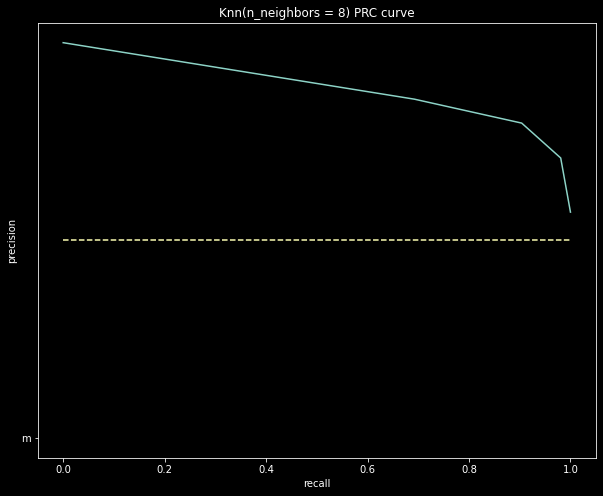

In [28]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize = (10,8))
plt.plot(recall, precision, label = 'Knn')
plt.plot([0, 1], [0.5, 0.5],'--','m')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Knn(n_neighbors = 8) PRC curve')
plt.show()


   * At the lowest point, i.e. at (0, 0)- the threshold is set at 1.0. This means our model makes no distinctions between the patients who have heart disease and the patients who don’t.
   * At the highest point i.e. at (1, 1), the threshold is set at 0.0. This means that both our precision and recall are high and the model makes distinctions perfectly.
   * The rest of the curve is the values of Precision and Recall for the threshold values between 0 and 1. Our aim is to make the curve as close to (1, 1) as possible- meaning a good precision and recall.
   * Similar to ROC, the area with the curve and the axes as the boundaries is the Area Under Curve(AUC). Consider this area as a metric of a good model. The AUC ranges from 0 to 1. Therefore, we should aim for a high value of AUC. Let us compute the AUC for our model and the above plot:


In [29]:
# calculate precision-recall AUC
auc_prc = auc(recall, precision)
print(auc_prc)

0.8879611737132924
